# CS5002: Programming Principles and Practice

## Practical P3: Data analysis and visualisation Python

In [1]:
import json
import pandas as pd

We start with exploring the content of the dataset.

In [2]:
df = pd.read_csv("../data/census-2021-public-microdata-teaching-sample.csv")

In [3]:
df

,SerialNum,AGE_BAND_AGG8,COB_AGG3,ECONOMIC_ACTIVITY_10M,ETHNIC_GROUP_AGG2,HEALTH_IN_GENERAL,FAMILY_TYPE,HH_SOCGRADE4,HOURS_PER_WEEK_WORKED,IN_FULL_TIME_EDUCATION,INDUSTRY_CURRENT_10A,LEGAL_PARTNERSHIP_STATUS_6A,OCCUPATION_CURRENT_1DIGIT,RELIGION_BELONG_TO,RELIGION_BROUGHT_UP_IN,SEX,UR_RESIDENCE_TYPE
0,1,2,1,1,1,2,4,3,2,2,8,1,4,1,-8,1,1
1,2,7,1,1,1,5,2,-8,1,2,8,2,2,3,-8,2,1
2,3,7,1,5,1,4,2,-8,-8,2,-8,2,-8,1,-8,2,1
3,4,7,1,7,1,1,2,-8,-8,2,-8,2,-8,8,2,1,1
4,5,3,1,1,1,2,2,3,4,2,4,1,8,1,-8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16889,16890,6,1,1,1,3,1,4,3,2,7,1,9,2,-8,2,1
16890,16891,2,1,6,1,2,5,3,-8,1,-8,1,-8,1,-8,2,1
16891,16892,3,1,1,1,1,4,4,2,2,8,1,6,1,-8,1,1
16892,16893,6,1,3,1,4,2,4,-8,2,-8,2,-8,2,-8,1,1


Next, we read the JSON file with the interpretations of categories.

In [4]:
with open("../data/data_dictionary.json", "r") as read_file:
    labels = json.load(read_file)

In [5]:
labels

{'FAMILY_TYPE': {'1': 'Not in a family',
  '2': 'Married or civil partnership couple family',
  '3': 'Cohabiting couple family',
  '4': 'Lone parent family (female)',
  '5': 'Lone parent family (male)',
  '-8': 'No code required (CE residents)'},
 'UR_RESIDENCE_TYPE': {'1': 'Resident in a household',
  '2': 'Resident in a communal establishment'}}

In [6]:
labels['FAMILY_TYPE']['2']

'Married or civil partnership couple family'

## **Basic requirements**

For census data (df) - Check that length of data matches total row number table above

In [7]:
df['SerialNum']

0            1
1            2
2            3
3            4
4            5
         ...  
16889    16890
16890    16891
16891    16892
16892    16893
16893    16894
Name: SerialNum, Length: 16894, dtype: int64

In [8]:
duplicate_rows = df[df.duplicated(keep=False)]
 
if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows.")

No duplicate rows.


### **1. Refine the dataset - write, import, and run script for proper refinement**

**Import script**

In [9]:
from refine import refine_data

**Run Script**

In [10]:
#Define file paths
CSV_FILEPATH = "../data/census-2021-public-microdata-teaching-sample.csv"
JSON_FILEPATH = "../data/data_dictionary.json"

In [11]:
#Execute the data refinement function
print("\nStarting data refinement process...")
refined_df = refine_data(csv_filepath=CSV_FILEPATH, json_filepath=JSON_FILEPATH)
print("Data refinement complete.")


Starting data refinement process...
Loaded 16894 rows
Removed 0 duplicate rows
CE residents code '-8' replaced with NaN.
Created new column 'FAMILY_TYPE_LABEL' using dictionary mapping
Created new column 'UR_RESIDENCE_TYPE_LABEL' using dictionary mapping
Data refinement complete.


**Check new refined file**

In [12]:
#Display the first few rows of the refined data to verify
print("Refined Data Sample (First 5 Rows)")
display(refined_df.head()) #source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

Refined Data Sample (First 5 Rows)


,SerialNum,AGE_BAND_AGG8,COB_AGG3,ECONOMIC_ACTIVITY_10M,ETHNIC_GROUP_AGG2,HEALTH_IN_GENERAL,FAMILY_TYPE,HH_SOCGRADE4,HOURS_PER_WEEK_WORKED,IN_FULL_TIME_EDUCATION,INDUSTRY_CURRENT_10A,LEGAL_PARTNERSHIP_STATUS_6A,OCCUPATION_CURRENT_1DIGIT,RELIGION_BELONG_TO,RELIGION_BROUGHT_UP_IN,SEX,UR_RESIDENCE_TYPE,FAMILY_TYPE_LABEL,UR_RESIDENCE_TYPE_LABEL
0,1,2,1,1,1,2,4,3,2,2,8,1,4,1,<NA>,1,1,Lone parent family (female),Resident in a household
1,2,7,1,1,1,5,2,<NA>,1,2,8,2,2,3,<NA>,2,1,Married or civil partnership couple family,Resident in a household
2,3,7,1,5,1,4,2,<NA>,<NA>,2,<NA>,2,<NA>,1,<NA>,2,1,Married or civil partnership couple family,Resident in a household
3,4,7,1,7,1,1,2,<NA>,<NA>,2,<NA>,2,<NA>,8,2,1,1,Married or civil partnership couple family,Resident in a household
4,5,3,1,1,1,2,2,3,4,2,4,1,8,1,<NA>,2,1,Married or civil partnership couple family,Resident in a household


### **2. Descriptive Analysis**

**Total Number of Records**

In [13]:
total_records = len(refined_df)

In [14]:
print(f"The total number of records in the dataset is {total_records}")

The total number of records in the dataset is 16894


**Type of Each Variable in the Dataset**

In [15]:
refined_df.dtypes

SerialNum                       Int64
AGE_BAND_AGG8                   Int64
COB_AGG3                        Int64
ECONOMIC_ACTIVITY_10M           Int64
ETHNIC_GROUP_AGG2               Int64
HEALTH_IN_GENERAL               Int64
FAMILY_TYPE                     Int64
HH_SOCGRADE4                    Int64
HOURS_PER_WEEK_WORKED           Int64
IN_FULL_TIME_EDUCATION          Int64
INDUSTRY_CURRENT_10A            Int64
LEGAL_PARTNERSHIP_STATUS_6A     Int64
OCCUPATION_CURRENT_1DIGIT       Int64
RELIGION_BELONG_TO              Int64
RELIGION_BROUGHT_UP_IN          Int64
SEX                             Int64
UR_RESIDENCE_TYPE               Int64
FAMILY_TYPE_LABEL              object
UR_RESIDENCE_TYPE_LABEL        object
dtype: object

**Find all different values that it takes and the number of occurrences for each value** (except for SerialNum)

In [16]:
for col in refined_df.columns:
    if col != 'SerialNum':
        counts = refined_df[col].value_counts() #source: Pokemons class example
        print(counts, "\n")

AGE_BAND_AGG8
1    3555
5    2295
4    2252
6    2192
3    2070
2    1685
7    1584
8    1261
Name: count, dtype: Int64 

COB_AGG3
1    14675
3     1118
2     1101
Name: count, dtype: Int64 

ECONOMIC_ACTIVITY_10M
1    6181
5    2679
2    1133
8     950
7     707
6     616
9     402
4     344
3     327
Name: count, dtype: Int64 

ETHNIC_GROUP_AGG2
1    16334
2      560
Name: count, dtype: Int64 

HEALTH_IN_GENERAL
1    8508
2    4819
3    2311
4     959
5     297
Name: count, dtype: Int64 

FAMILY_TYPE
2    9632
1    2770
4    2631
3    1529
5     332
Name: count, dtype: Int64 

HH_SOCGRADE4
2    4047
4    3469
3    3262
1    2799
Name: count, dtype: Int64 

HOURS_PER_WEEK_WORKED
3    4536
2    1575
1     775
4     701
Name: count, dtype: Int64 

IN_FULL_TIME_EDUCATION
2    12401
1     3547
Name: count, dtype: Int64 

INDUSTRY_CURRENT_10A
8    2565
5    1564
7    1050
4     660
2     646
6     556
9     270
1     183
3      93
Name: count, dtype: Int64 

LEGAL_PARTNERSHIP_STATUS_6A
2  

### **3. Plots**

**Bar chart for the number of records for each age category**

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
agecat_records = refined_df['AGE_BAND_AGG8'].value_counts()
agecat_records

AGE_BAND_AGG8
1    3555
5    2295
4    2252
6    2192
3    2070
2    1685
7    1584
8    1261
Name: count, dtype: Int64

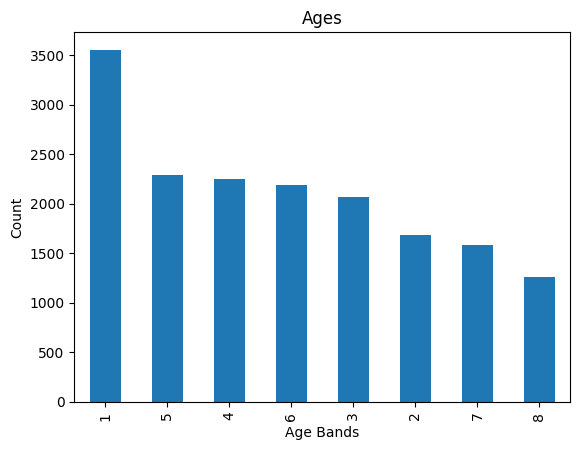

In [19]:
agecat_records.plot(kind='bar', legend=False)
plt.xlabel('Age Bands')
plt.ylabel('Count')
plt.title('Ages')
plt.show()

**Bar Chart for the number of records for each economic activity caterory**

In [20]:
econ_records = refined_df['ECONOMIC_ACTIVITY_10M'].value_counts()
econ_records

ECONOMIC_ACTIVITY_10M
1    6181
5    2679
2    1133
8     950
7     707
6     616
9     402
4     344
3     327
Name: count, dtype: Int64

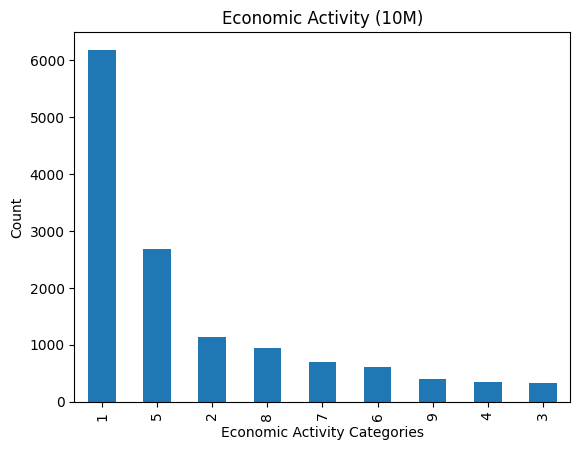

In [21]:
econ_records.plot(kind='bar', legend=False)
plt.xlabel('Economic Activity Categories')
plt.ylabel('Count')
plt.title('Economic Activity (10M)')
plt.show()

## **Additional requirements**

### **Easy**

**Pie chart for the percentage of records for each general health category**

In [22]:
health_cat = refined_df['HEALTH_IN_GENERAL'].value_counts()
health_cat

HEALTH_IN_GENERAL
1    8508
2    4819
3    2311
4     959
5     297
Name: count, dtype: Int64

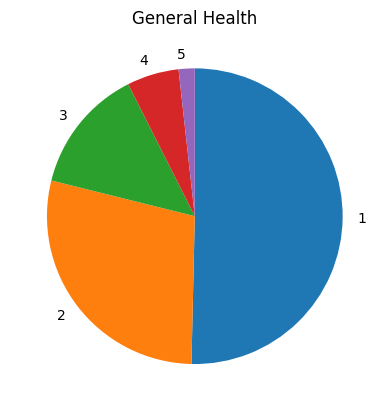

In [23]:
health_cat.plot(kind='pie', startangle=90, counterclock=False)
plt.ylabel('')
plt.title('General Health')
plt.show()

**Pie chart for the percentage of records for each working hours per week category**

In [24]:
weeklyworkhours_cat = refined_df['HOURS_PER_WEEK_WORKED'].value_counts()
weeklyworkhours_cat

HOURS_PER_WEEK_WORKED
3    4536
2    1575
1     775
4     701
Name: count, dtype: Int64

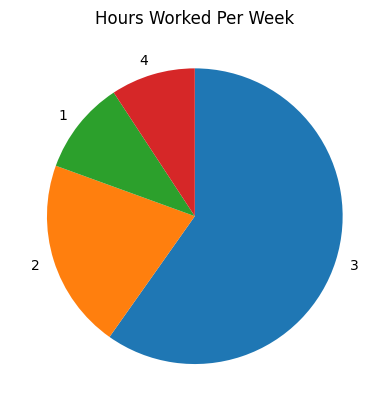

In [25]:
weeklyworkhours_cat.plot(kind='pie', startangle=90, counterclock=False)
plt.ylabel('')
plt.title('Hours Worked Per Week')
plt.show()

### **Medium**

**Number of records depending on hours worked per week and general health description**

In [26]:
work_vs_health = refined_df.groupby(['HOURS_PER_WEEK_WORKED', 'HEALTH_IN_GENERAL'])['SerialNum'].count().unstack(fill_value=0)
work_vs_health

HEALTH_IN_GENERAL,1,2,3,4,5
HOURS_PER_WEEK_WORKED,,,,,
1,431,238,79,20,7
2,766,607,169,26,7
3,2507,1590,375,58,6
4,407,221,69,3,1


**Number of records depending on age and current occupation**

In [27]:
age_vs_job = refined_df.groupby(['AGE_BAND_AGG8', 'OCCUPATION_CURRENT_1DIGIT'])['SerialNum'].count().unstack(fill_value=0)
age_vs_job

OCCUPATION_CURRENT_1DIGIT,1,2,3,4,5,6,7,8,9
AGE_BAND_AGG8,,,,,,,,,
2,11,107,54,67,117,104,197,47,123
3,91,428,194,164,190,183,158,85,165
4,215,439,193,188,205,172,103,132,133
5,209,366,145,245,225,154,100,143,151
6,146,213,92,158,190,143,92,133,123
7,25,31,17,27,41,27,22,28,38
8,5,3,1,6,14,0,4,0,5


**Number of economically active people depending on age**

In [44]:
econactive_codes = range(1, 5) #according to census-2021-public-microdata-teaching-sample-for-northern-ireland-data-dictionary.xlsx

econ_active = refined_df[refined_df['ECONOMIC_ACTIVITY_10M'].isin(econactive_codes)]
active_by_age = econ_active.groupby('AGE_BAND_AGG8').size()

print("Number of Economically Active People by Age Band")
active_by_age

Number of Economically Active People by Age Band


AGE_BAND_AGG8
2     979
3    1727
4    1845
5    1796
6    1339
7     261
8      38
dtype: int64

**Number of economically inactive people depending on a health descriptor**

In [29]:
health_descriptors = {
    1: 'Very Good Heath',
    2: 'Good health',
    3: 'Fair health',
    4: 'Bad health',
    5: 'Very bad health'
}

In [30]:
health_codes = []
for key in health_descriptors:
    health_codes.append(key)

In [31]:
health_codes

[1, 2, 3, 4, 5]

In [32]:
econinactive_dict = {
    5: 'Economically Inactive: Retired',
    6: 'Economically Inactive: Student',
    7: 'Economically Inactive: Looking after family or home',
    8: 'Economically Inactive: Long term sick or disabled',
    9: 'Economically inactive: Other'
}

In [37]:
econ_inactive_df = refined_df[refined_df['ECONOMIC_ACTIVITY_10M'].isin(econinactive_dict)]

inactive_by_health = econ_inactive_df.groupby('HEALTH_IN_GENERAL').size()
inactive_by_health_df = inactive_by_health.reset_index(name='Count') #source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
inactive_by_health_df['Health Descriptor'] = inactive_by_health_df['HEALTH_IN_GENERAL'].map(health_descriptors)

inactive_by_health_df.rename(columns={'HEALTH_IN_GENERAL': 'Health Key'}, inplace=True)
inactive_by_health_df = inactive_by_health_df[['Health Key', 'Health Descriptor', 'Count']]
 
print("Number of Economically Inactive People by Health Descriptor")
inactive_by_health_df
 

Number of Economically Inactive People by Health Descriptor


,Health Key,Health Descriptor,Count
0,1,Very Good Heath,1249
1,2,Good health,1547
2,3,Fair health,1473
3,4,Bad health,814
4,5,Very bad health,271


**Number of working hours per week for students**

In [34]:
status_dict = {
    1: 'Student or schoolchild',
    2: 'Not a student or schoolchild'
}

In [39]:
allecon_dict = {
    1: 'Economically active (excluding full-time students): Employee',
    2: 'Economically active (excluding full-time students): Self-employed',
    3: 'Economically active (excluding full-time students): Unemployed',
    4: 'Economically active: Full-time student',
    5: 'Economically Inactive: Retired',
    6: 'Economically Inactive: Student',
    7: 'Economically Inactive: Looking after family or home',
    8: 'Economically Inactive: Long term sick or disabled',
    9: 'Economically inactive: Other'
}

In [43]:
student_econ = {
    key: value 
    for key, value in allecon_dict.items() 
    if key in [4, 6]
}

student_econ

{4: 'Economically active: Full-time student',
 6: 'Economically Inactive: Student'}

In [38]:
in_school_df = refined_df[refined_df['IN_FULL_TIME_EDUCATION'].isin(status_dict)]
student_econ_df = refined_df[refined_df['ECONOMIC_ACTIVITY_10M'].isin(student_econ)]

student_work = in_school_df.groupby(student_econ_df).size()
student_work_df = student_work.reset_index(name='Count') #source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
student_work_df['Status'] = inactive_by_health_df['ECONOMIC_ACTIVITY_10M'].map(status_dict)

student_work_df.rename(columns={'HEALTH_IN_GENERAL': 'Health Key'}, inplace=True)
student_work_df = student_work_df[['Health Key', 'Health Descriptor', 'Count']]
 
print("Number of Working Hours Per Week For Students:")
inactive_by_health_df

Number of Working Hourse Per Week For Students:


,Health Key,Health Descriptor,Count
0,1,Very Good Heath,1249
1,2,Good health,1547
2,3,Fair health,1473
3,4,Bad health,814
4,5,Very bad health,271
